In [2]:
import os

import numpy as np

from build_vocabulary import build_vocabulary
from create_results_webpage import create_results_webpage
from get_bags_of_words import get_bags_of_words
from get_image_paths import get_image_paths
from svm_classify import svm_classify
from get_spatial_pyramid_feats import get_spatial_pyramid_feats
from pca_visualize import pca_visualize

In [3]:
feature = 'HoG'
# feature = 'SIFT'

kernel_type = 'RBF'
# kernel_type = 'linear'

pca_out_dim = 2

# representation = 'bag of words'
representation = 'spatial_pyramid_feats'

max_level = 2

classifier = 'SVM'
data_path = './data/'

categories = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office',
              'Industrial', 'Suburb', 'InsideCity', 'TallBuilding',
              'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain',
              'Forest']

abbr_categories = ['Kit', 'Sto', 'Bed', 'Liv', 'Off', 'Ind', 'Sub',
                   'Cty', 'Bld', 'St', 'HW', 'OC', 'Cst', 'Mnt', 'For']

# Number of training examples per category to use.
num_train_per_cat = 100

# Vocabulary size (number of clusters for k-means clustering)
vocab_size = 200

In [4]:
def main():
    print('Getting paths and labels for all train and test data')
    train_image_paths, test_image_paths, train_labels, test_labels = \
        get_image_paths(data_path, categories, num_train_per_cat)

    """ Step 1: Represent each image with the appropriate feature
    Each function to construct features should return and N x d matrix, where
    N is the number of paths passed to the function and d is the dimensionality
    of each image representation.
    """
    print('Using [%s] representation for image' % representation)

    if feature == 'HoG':
        if not os.path.exists('vocab_hog.npy'):
            print('No existing visual word vocabulary found. '
                  'Computing one from training images')

            vocab = build_vocabulary(train_image_paths, vocab_size, feature)
            np.save('vocab_hog', vocab)
    elif feature == 'SIFT':
        if not os.path.exists('vocab_sift.npy'):
            print('No existing visual word vocabulary found. '
                  'Computing one from training images')

            vocab = build_vocabulary(train_image_paths, vocab_size, feature)
            np.save('vocab_sift', vocab)

    pca_visualize(pca_out_dim, feature, vocab_size)

    if representation == 'bag of words':
        # Build vocabulary and save it as a file 'vocab.mat' for reuse.
        train_image_feats = get_bags_of_words(train_image_paths, feature)
        test_image_feats = get_bags_of_words(test_image_paths, feature)
    elif representation == 'spatial_pyramid_feats':
        train_image_feats = get_spatial_pyramid_feats(train_image_paths, max_level, feature)
        test_image_feats = get_spatial_pyramid_feats(test_image_paths, max_level, feature)
    else:
        raise KeyError('No such representation %s is defined' % representation)

    """ Step 2: Classify each test image by training and using the appropriate classifier
    Each function to classify test features will return an N x 1 array, where
    N is the number of test cases and each entry is string indicating the predicted
    category for each test image. Each entry in 'predicted_categories' must be one of
    the 15 string in 'categories', 'train_labels', and 'test_labels'.
    """
    print('Using [%s] classifier to predict test set categories' % classifier)

    if classifier == 'SVM':
        predicted_categories = svm_classify(train_image_feats, train_labels, test_image_feats, kernel_type)
    else:
        raise KeyError('No such classifier %s is defined' % classifier)

    """ Step 3: Build a confusion matrix and score the recongnition system
    You do not need to code anything in this section.
    """
    create_results_webpage(train_image_paths, test_image_paths, train_labels, test_labels,
                           categories, abbr_categories, predicted_categories)

Getting paths and labels for all train and test data
Using [spatial_pyramid_feats] representation for image


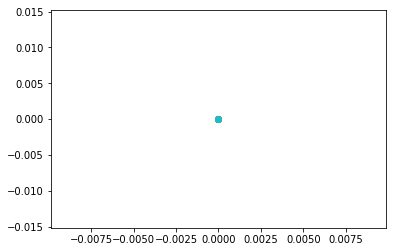

Using [SVM] classifier to predict test set categories
Creating results_webpage/index.html, thumbnails, and confusion matrix
Accuracy (mean of diagonal of confusion matrix) is 0.067


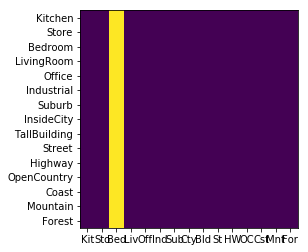

In [5]:
if __name__ == '__main__':
    main()